In [2]:
from dpp import distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### Set parameters

In [3]:
xmin, xmax = 0., 10.
x0 = 2
sigma = 4
N = 100

In [4]:
astar = distribution.get_astar(xmin, xmax, x0, sigma)
amin = distribution.get_amin(xmin, xmax, x0, sigma)
step_min, step_max = distribution.get_step_limits(xmin, xmax, x0, sigma, N)
print('astar={}'.format(astar))
print('amin={}'.format(amin))
print('(step_min,step_max)=({},{})'.format(step_min, step_max))

astar=-0.670485292913
amin=-0.135335283237
(step_min,step_max)=(0.1,1.17156933777)


### Plot step domain

In [5]:
steps = np.linspace(step_min/10, step_max*5, 1000)
steps = [2**i for i in np.linspace(-5, 5, 1000)]
a_tab = [distribution.get_shift_constant_from_step(xmin, xmax, x0, sigma, N, step) for step in steps]
A_tab = [distribution.get_normalization(xmin, xmax, x0, sigma, N, a)/1000 for a in a_tab]

<IPython.core.display.Javascript object>


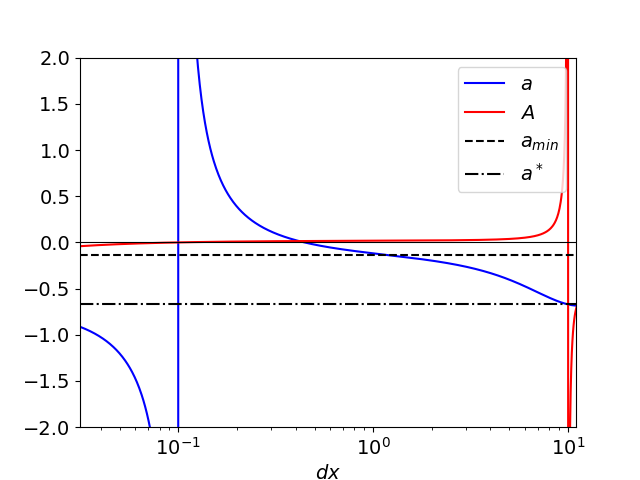

In [9]:
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(steps, a_tab, color='b', label='$a$')
ax.plot(steps, A_tab, color='r', label='$A$')
ax.axhline(amin, 0, 1, color='k', Linestyle='--', label='$a_{min}$')
ax.axhline(astar, 0, 1, color='k', Linestyle='-.', label='$a^*$')
ax.axhline(0, 0, 1, color='k', Linestyle='-', linewidth=0.8)

ax.set(xscale='log')
ax.set_xlabel('$dx$', fontsize=14)
ax.tick_params(labelsize=14)
plt.xlim(0, 11)
plt.ylim(-2,2)
plt.legend(loc='upper right', fontsize=14)
plt.show()

### get gradation

In [6]:
step = 0.5
x1 = distribution.gradation(xmin, xmax, x0, sigma, N, step=0.2)
x2 = distribution.gradation(xmin, xmax, x0, sigma, N, step=0.5)
x3 = distribution.gradation(xmin, xmax, x0, sigma, N, step=1)
print('last step is {}'.format(x1[-1]-x1[-2]))

last step is 0.2


<IPython.core.display.Javascript object>


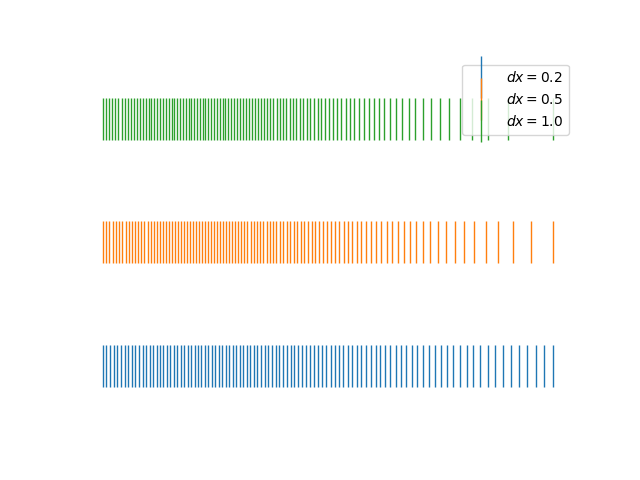

In [8]:
%matplotlib notebook
y1 = np.ones(len(x1))*1
y2 = np.ones(len(x2))*2
y3 = np.ones(len(x3))*3

fig, ax = plt.subplots()
ax.plot(x1, y1, marker='|', markersize=30, Linestyle='None', label='$dx=0.2$')
ax.plot(x2, y2, marker='|', markersize=30, Linestyle='None', label='$dx=0.5$')
ax.plot(x3, y3, marker='|', markersize=30, Linestyle='None', label='$dx=1.0$')

plt.legend()

plt.ylim(0.5, 3.5)
plt.axis('off')
plt.show()

### Plot distribution

<IPython.core.display.Javascript object>


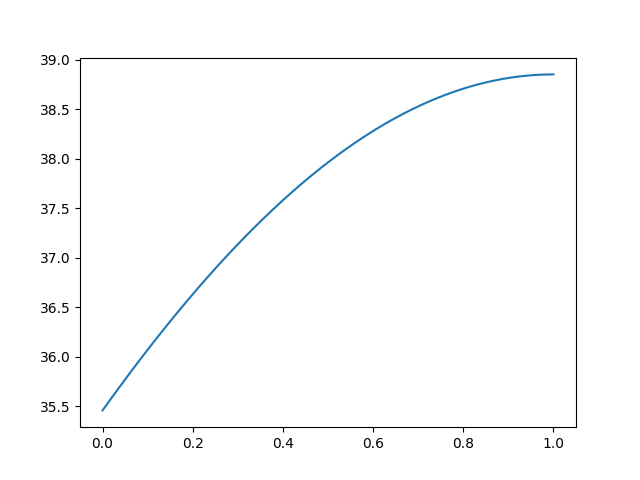

In [17]:
a = distribution.get_shift_constant_from_step(xmin, xmax, x0, sigma, N, step)
A = distribution.get_normalization(xmin, xmax, x0, sigma, N, a)
f = distribution.shifted_gaussian_distribution(x0, sigma, a, A)

x_ = np.linspace(0,1,1000)
y_ = f(x_)

fig, ax = plt.subplots()
ax.plot(x_, y_)
plt.show()

In [18]:
sum(y_)/1000

37.69138562174171